<h1> Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Именованные-аргументы" data-toc-modified-id="Именованные-аргументы-1">Именованные аргументы</a></span></li></ul></div>

In [7]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle 
import pandas as pd

In [8]:
url = f'https://api.hh.ru/areas'
res = requests.get(url)
_all_countries = res.json()
for _country in _all_countries:
    print(f"id: {_country.get('id')} - {_country.get('name')}")

id: 113 - Россия
id: 5 - Украина
id: 40 - Казахстан
id: 9 - Азербайджан
id: 16 - Беларусь
id: 28 - Грузия
id: 1001 - Другие регионы
id: 48 - Кыргызстан
id: 97 - Узбекистан


In [9]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
moscow = 1

def get_all_russian_areas():
    """Получаем список регионов для России"""
    
    url = f'https://api.hh.ru/areas/113'
    res = requests.get(url)
    _country = res.json()
    
    _russian_areas_ids = []
    for _region in _country.get("areas"):
        # print(f"id:{_region.get('id')}{_region.get('name')}")
        _russian_areas_ids.append(_region.get('id'))
                
    return _russian_areas_ids
                
def get_page(page, area):
    """Получаем постраничные данные из api по региону """
    
    sber = '3529'
    num_per_page = 100

    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={area}'
    res = requests.get(url)
    return res.json()

def get_vacancis(area):
    """Получаем все вакансии по региону `area`"""
    
    num_pages = get_page(0, area).get("pages")
    vacs = []
    for page in tqdm(range(num_pages)):
        vacs += get_page(page, area).get('items')
    
    return vacs
        

_areas = get_all_russian_areas()
vacs = []
for area in tqdm(_areas):
    #print(area)
    vacs += get_vacancis(area)
    
len(vacs)


  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

4106

In [10]:
# Вытащите все описания этих вакансий

d = {'ids': [ el.get("id") for el in vacs], 
     'name': [ el.get("name") for el in vacs],
     'discriptions': [ el.get("snippet").get("responsibility") for el in vacs]}
vacancy = pd.DataFrame(data=d)
len(vacancy)

4106

In [11]:
#  Создайте аналогичный vacancy DataFrame только добавьте поле skills

def get_vacancy_details(vac_id):
    """Получаем подробную информацию по вакансии"""

    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    return res.json()

print("load details for vacancies")
for _key in tqdm(range(len(vacs))):
    vacs[_key] = get_vacancy_details(vacs[_key].get('id'))

load details for vacancies


  0%|          | 0/4106 [00:00<?, ?it/s]

,ids,name,discriptions,skills
0,43120418,Кассир,<p><strong>Обязанности:</strong></p> <ul> <li>...,[]
1,43181202,Мобильный менеджер по продажам,<p>Задача мобильного менеджера ― продавать про...,"[Активные продажи, Холодные продажи]"
2,43281570,Специалист по прямым продажам,<p>У каждого зарплатного клиента Сбера есть св...,"[Прямые продажи, Активные продажи, Холодные пр..."
3,43298141,Мобильный менеджер по продажам,<p>Задача мобильного менеджера ― продавать про...,"[Активные продажи, Холодные продажи, Навыки пр..."
4,43696733,Мобильный менеджер по продажам,<p>Задача мобильного менеджера ― продавать про...,[]
...,...,...,...,...
4101,43751804,Ведущий специалист по оценке залогового имущества,<p><strong>Обязанности:</strong></p> <p> </p> ...,[]
4102,43764191,Специалист по прямым продажам,<p>У каждого зарплатного клиента Сбера есть св...,"[Прямые продажи, Продажа страховых продуктов, ..."
4103,43767297,Руководитель направления центра залоговой эксп...,<p><strong>Обязанности:</strong></p> <p> </p> ...,[]
4104,43767299,Главный специалист по оценке залогового имущества,<p><strong>Обязанности:</strong></p> <p> </p> ...,[]


In [12]:
with open('vacs.pyc', mode='wb') as fh:
    pickle.dump(vacs, fh)

In [13]:
with open('vacs.pyc', 'rb') as fh:
    vacs = pickle.load(fh)
    
d = {'ids': [ el.get("id") for el in vacs], 
     'name': [ el.get("name") for el in vacs],
     'discriptions': [ el.get("description") for el in vacs],
     'skills': [ [skill.get("name") for skill in vac.get("key_skills", [])] for vac in vacs],
    }
vacancy = pd.DataFrame(data=d)    

In [14]:
# Переведите даты публикаций в datetime
vacancy["published_at"] = [ el.get("published_at") for el in vacs]
vacancy["published_at"] = pd.to_datetime(vacancy["published_at"])
vacancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106 entries, 0 to 4105
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   ids           4106 non-null   object                               
 1   name          4106 non-null   object                               
 2   discriptions  4106 non-null   object                               
 3   skills        4106 non-null   object                               
 4   published_at  4106 non-null   datetime64[ns, pytz.FixedOffset(180)]
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), object(4)
memory usage: 160.5+ KB


In [15]:
# Постройте график опубликованных вакансий по датам
import matplotlib.pyplot as plt
vacancy["pb_date"] = vacancy["published_at"].dt.date
vacancy.groupby("pb_date")["ids"].count()

pb_date
2021-03-12     19
2021-03-13     16
2021-03-14     13
2021-03-15    137
2021-03-16    116
2021-03-17     98
2021-03-18    146
2021-03-19     90
2021-03-20     38
2021-03-21     17
2021-03-22    185
2021-03-23    149
2021-03-24    148
2021-03-25    138
2021-03-26    114
2021-03-27     17
2021-03-28     15
2021-03-29    217
2021-03-30    142
2021-03-31    422
2021-04-01    239
2021-04-02    231
2021-04-03     43
2021-04-04     26
2021-04-05    310
2021-04-06    257
2021-04-07    184
2021-04-08    244
2021-04-09    259
2021-04-10     38
2021-04-11     38
Name: ids, dtype: int64

In [16]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
vacancy["pb_wd"] = vacancy["published_at"].apply(lambda x:("пн", "вт", "ср", "чт", "пт", "сб", "вс")[x.weekday()])
vacancy.groupby("pb_wd")["ids"].count().sort_values(ascending=False)

pb_wd
ср    852
пн    849
чт    767
пт    713
вт    664
сб    152
вс    109
Name: ids, dtype: int64

In [17]:
# Найдите те вакансии с использованием python, которые вам интересны?
# Find vacancy 'name' == 'Бизнес аналитик', 'Аналитик данных', 'Data analyst' and 'skills' == 'Python'
tmp_name = 'Бизнес аналитик|Аналитик данных|Data analyst'.upper()
tmp_da = vacancy[vacancy.name.str.upper().str.contains(tmp_name)]
tmp_py = 'Python'.upper()
tmp_sk_py = vacancy[vacancy.skills.astype(str).str.upper().str.contains(tmp_py)]
vacancy_da_py = tmp_da[tmp_da.ids.isin(tmp_sk_py.ids)]
vacancy_da_py

,ids,name,discriptions,skills,published_at,pb_date,pb_wd
744,42171232,Data Analyst,<p>Мы ищем специалистов в работе с данными. Пр...,"[SQL, Python]",2021-03-15 11:10:36+03:00,2021-03-15,пн
1256,43249310,Аналитик данных,<p><strong>Функции (до конца 2021):</strong></...,"[Oracle Pl/SQL, MS SQL, SQL, PostgreSQL, Базы ...",2021-04-09 11:11:03+03:00,2021-04-09,пт
1464,43429001,Junior Data Analyst (SberDevices),<p>В SberDevices в команду Вопросно-ответных с...,"[Python, SQL, Обучение и развитие, Управление ...",2021-04-05 11:07:28+03:00,2021-04-05,пн
1726,43617621,Data Analyst ассистентов Салют (SberDevices),SberDevices – инновационное направление компан...,"[Python, SQL]",2021-04-05 15:38:36+03:00,2021-04-05,пн
1762,43643834,Аналитик данных (Развитие внешнеэкономического...,<strong>Обязанности:</strong> <ul> <li>Формиро...,"[PostgreSQL, Oracle Pl/SQL, Python, SQL, ORACLE]",2021-04-06 12:03:20+03:00,2021-04-06,вт
2977,37789843,Аналитик данных (Data Analyst),<strong>Обязанности:</strong> <p>-Ad hoc анали...,"[SQL, MS SQL, Анализ данных, Работа с базами д...",2021-04-09 18:09:48+03:00,2021-04-09,пт


In [18]:
# Объединяем значение всех ячеек колонки 'skills' в одну строку
skills = []
for i in vacancy_da_py['skills']:
    skills += i
    
pd.Series(skills).value_counts()

SQL                                 6
Python                              6
MS SQL                              2
Анализ данных                       2
Oracle Pl/SQL                       2
PostgreSQL                          2
Teradata                            1
ORACLE                              1
SCALA                               1
Тайм-менеджмент                     1
Hadoop                              1
База данных: Oracle                 1
Базы данных                         1
Github                              1
Обучение и развитие                 1
Bitbucket                           1
Git                                 1
Управление временем                 1
MySQL                               1
Cистемы управления базами данных    1
ETL                                 1
Работа с базами данных              1
dtype: int64

In [19]:
vacancy_da_py['skills']

744                                         [SQL, Python]
1256    [Oracle Pl/SQL, MS SQL, SQL, PostgreSQL, Базы ...
1464    [Python, SQL, Обучение и развитие, Управление ...
1726                                        [Python, SQL]
1762     [PostgreSQL, Oracle Pl/SQL, Python, SQL, ORACLE]
2977    [SQL, MS SQL, Анализ данных, Работа с базами д...
Name: skills, dtype: object

In [22]:
# Постройте график наиболее востребованных вакансий
# Выбираем наиболее часто встречающие вакансии из колонки 'name'
_str2 = ' '.join(vacancy['name'])
exclude_chars2 = [',', '...', '.', "(", ")", '/', '(', ')']
for _ch in exclude_chars2:
    _str2 =_str2.replace(_ch, " ")
exclude_words2 = ['и', ' ', '', 'в', 'или', 'с', 'для', 'на', 'от', 'по']
words2 = [_.upper() for _ in _str2.split(" ") if _ not in exclude_words2]
pd.Series(words2).value_counts().head(10)

МЕНЕДЖЕР               1243
ПРОДАЖАМ                902
СПЕЦИАЛИСТ              511
МОБИЛЬНЫЙ               425
СТАРШИЙ                 382
АНАЛИТИК                293
ИНЖЕНЕР                 287
РАЗРАБОТЧИК             278
ВОДИТЕЛЬ-ИНКАССАТОР     266
JAVA                    208
dtype: int64

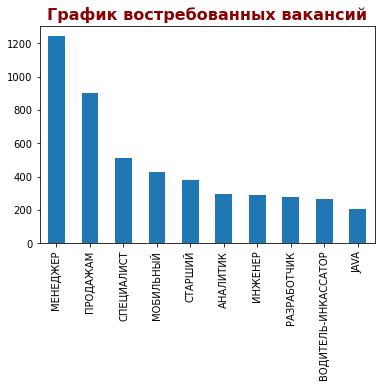

In [23]:
# Строим график выбранных вакансий
import matplotlib.pyplot as plt
%matplotlib inline
popular_vacs = pd.Series(words2).value_counts().head(10)
popular_vacs.plot(kind='bar')
plt.title('График востребованных вакансий', fontsize=16, fontweight='bold', color='DarkRed')
plt.show()

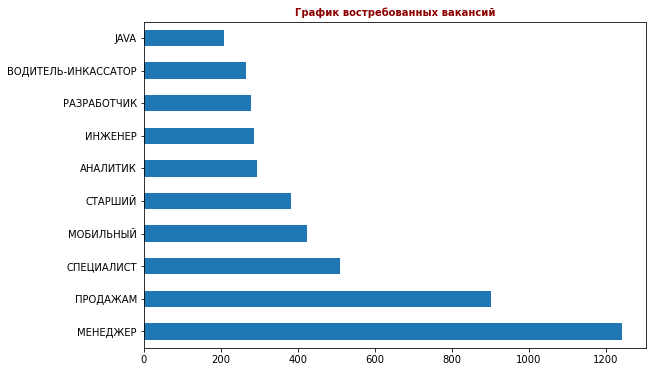

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,6
popular_vacs.plot(kind='barh')
plt.title('График востребованных вакансий', fontsize=10, fontweight='bold', color='DarkRed')
plt.show()